# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [10]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [12]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [15]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')

In [16]:
# Extract all rows of data
all_text = soup.get_text()
print(all_text)







Mars Temperature Data








Mission To Mars




Mars Temperature Data
This is Mars data.


id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [20]:
# Find the table element (assuming there's only one table)
table = soup.find('table')
# Extract all rows from the table
rows = table.find_all('tr')

In [21]:
# Create an empty list
data = []
# Extract the header (column names)
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
        columns = row.find_all('td')
        if len(columns) > 0:  # Skip rows with no data
            row_data = [col.text.strip() for col in columns]
            data.append(row_data)

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=headers)

In [23]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [25]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' and 'month' to integers (if they're not already)
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to floats (if they're not already)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Verify the changes
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                          object
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [26]:
# Confirm type changes were successful by examining data types again
# Verify the changes
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                          object
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"Number of unique months on Mars in the dataset: {num_months}")

Number of unique months on Mars in the dataset: 12


In [28]:
num_sols = df['sol'].nunique()
print(f"Number of unique sols (Martian days) in the dataset: {num_sols}")

Number of unique sols (Martian days) in the dataset: 1867


In [29]:
# 3. What is the average minimum temperature by month?
# Group by 'month' and calculate the average of 'min_temp'
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the result
print(average_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


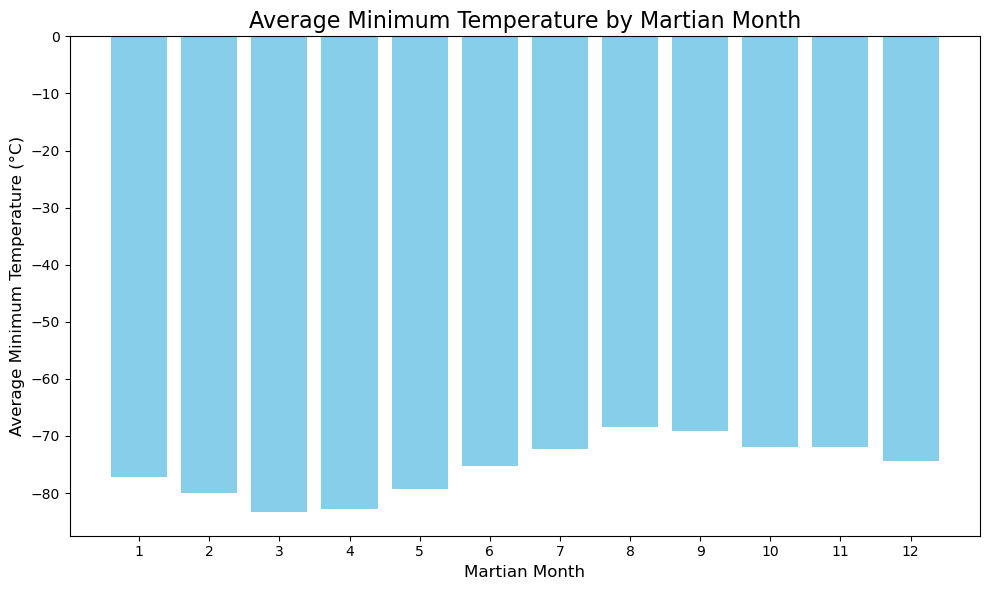

In [30]:
# Plot the average minimum temperature by month
# Group by 'month' and calculate the average 'min_temp'
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_min_temp_by_month.index, average_min_temp_by_month.values, color='skyblue')

# Add titles and labels
plt.title('Average Minimum Temperature by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.xticks(range(1, 13))  
plt.tight_layout()
plt.show()


Coldest Month: 3, Average Temperature: -83.30729166666667°C
Hottest Month: 8, Average Temperature: -68.38297872340425°C


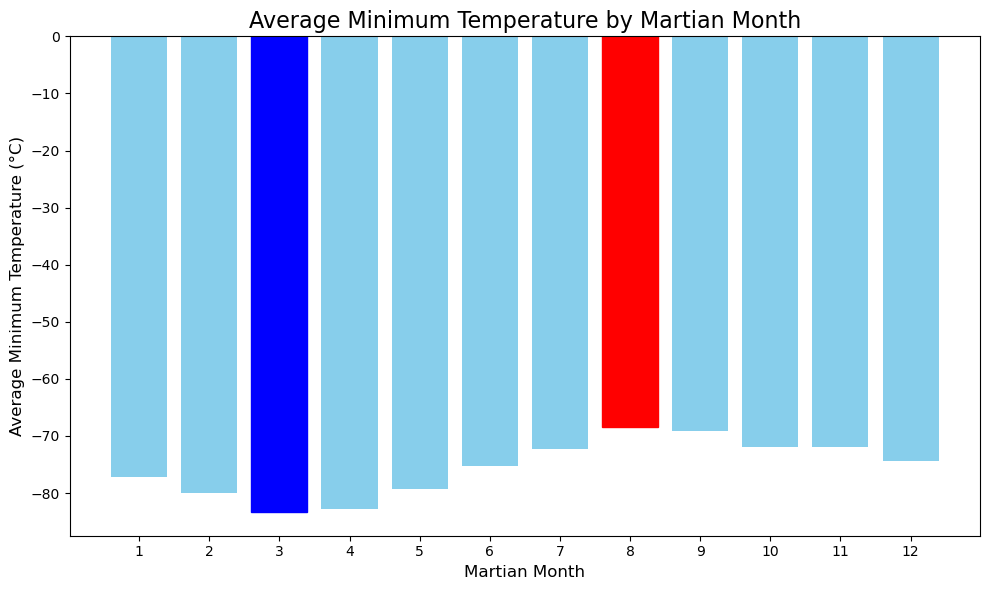

In [32]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature by month
sorted_min_temp = average_min_temp_by_month.sort_values()

# Display the coldest and hottest months
coldest_month = sorted_min_temp.idxmin()
hottest_month = sorted_min_temp.idxmax()

print(f"Coldest Month: {coldest_month}, Average Temperature: {sorted_min_temp[coldest_month]}°C")
print(f"Hottest Month: {hottest_month}, Average Temperature: {sorted_min_temp[hottest_month]}°C")
# Create a bar plot for the average minimum temperature by month
plt.figure(figsize=(10, 6))
bars = plt.bar(average_min_temp_by_month.index, average_min_temp_by_month.values, color='skyblue')

# Highlight the coldest and hottest months
bars[coldest_month-1].set_color('blue')  # Coldest month
bars[hottest_month-1].set_color('red')  # Hottest month

# Add titles and labels
plt.title('Average Minimum Temperature by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.xticks(range(1, 13))  # Ensure the x-axis shows 1-12 for months
plt.tight_layout()
plt.show()

In [33]:
# 4. What is the average pressure by month?
# Group by 'month' and calculate the average of 'pressure'
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


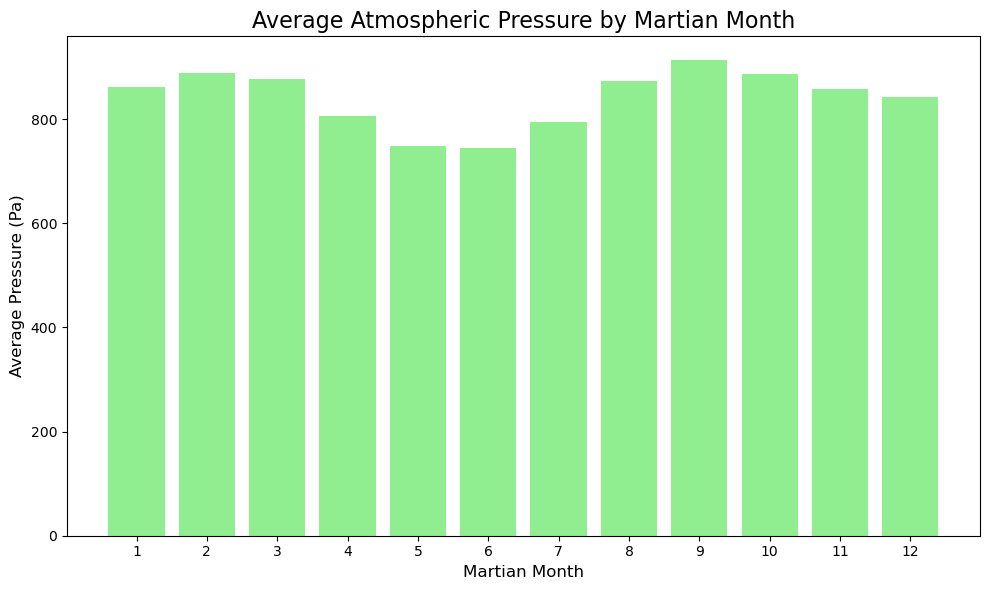

In [34]:
# Plot the average pressure by month

# Create a bar plot for the average atmospheric pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='lightgreen')

# Add titles and labels
plt.title('Average Atmospheric Pressure by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.xticks(range(1, 13))  # Ensure the x-axis shows 1-12 for months
plt.tight_layout()
plt.show()

Lowest Pressure Month: 6, Average Pressure: 745.0544217687075 Pa
Highest Pressure Month: 9, Average Pressure: 913.3059701492538 Pa


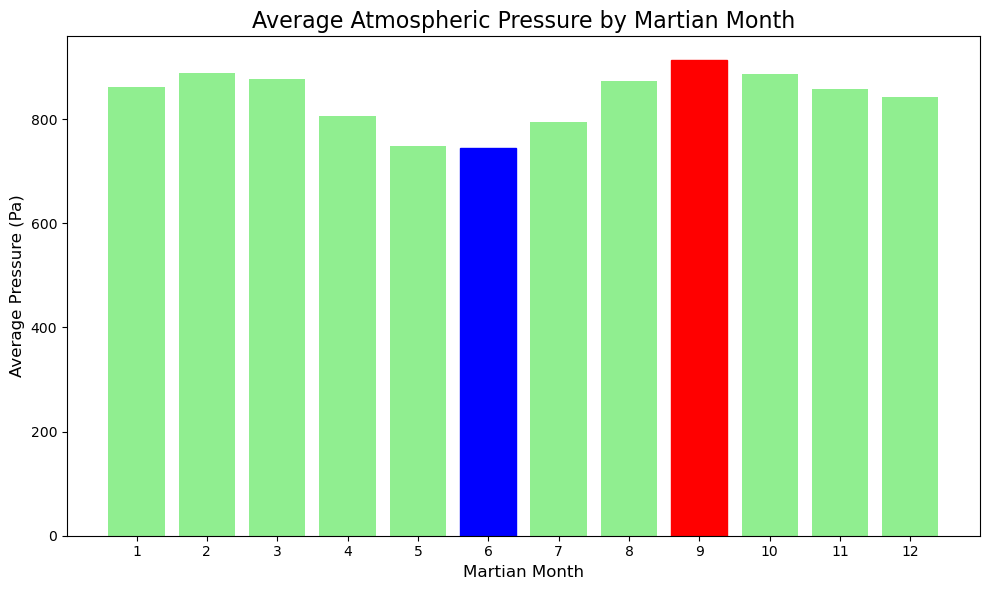

In [36]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month
sorted_pressure = average_pressure_by_month.sort_values()

# Display the lowest and highest pressure months
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()

print(f"Lowest Pressure Month: {lowest_pressure_month}, Average Pressure: {sorted_pressure[lowest_pressure_month]} Pa")
print(f"Highest Pressure Month: {highest_pressure_month}, Average Pressure: {sorted_pressure[highest_pressure_month]} Pa")

# Create a bar plot for the average atmospheric pressure by month
plt.figure(figsize=(10, 6))
bars = plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='lightgreen')

# Highlight the lowest and highest pressure months
bars[lowest_pressure_month-1].set_color('blue')  # Lowest pressure month
bars[highest_pressure_month-1].set_color('red')  # Highest pressure month

# Add titles and labels
plt.title('Average Atmospheric Pressure by Martian Month', fontsize=16)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.xticks(range(1, 13))  # Ensure the x-axis shows 1-12 for months
plt.tight_layout()
plt.show()

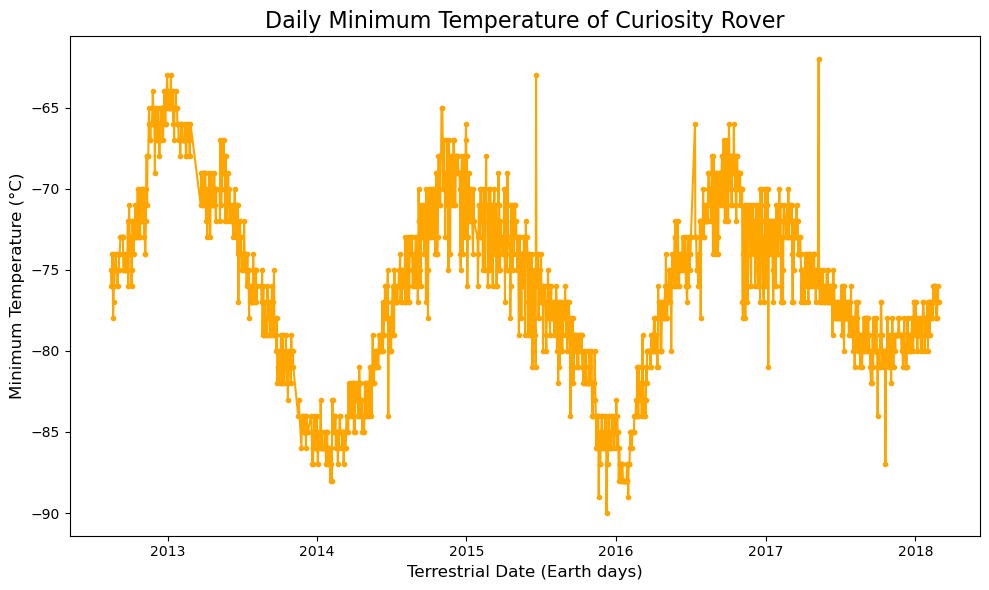

In [37]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature over time (terrestrial date)
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='orange', linestyle='-', marker='o', markersize=3)

# Add titles and labels
plt.title('Daily Minimum Temperature of Curiosity Rover', fontsize=16)
plt.xlabel('Terrestrial Date (Earth days)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data
Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
df.to_csv('mars_temperature_data.csv', index=False)

print("Data exported to 'mars_temperature_data.csv'")

Data exported to 'mars_temperature_data.csv'


In [39]:
browser.quit()